<a href="https://colab.research.google.com/github/AnasAkenoun/MonteCarlo_simulation_single-electron/blob/main/MonteCarlo_simulation_single_electron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We are going to follow the hereunder steps:**


1-Generate random numbers.

2-We define the number of electrons num_electrons, the number of time steps num_steps, and the possible energy states of the quantum well

3- Define time rqnge of the transition recording
4- Randomly select an electron to jump

5-Calculate the potential energy difference for jumping to a neighboring position

6- Calculate the probability of jumping to a neighboring position

7- Update the energy of the electron selected

The electrons are now is in their energy states
8- Select an electron (by user) and record it's energy states over time

9- Plot the energy states of the selected electron over time

100
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4.]


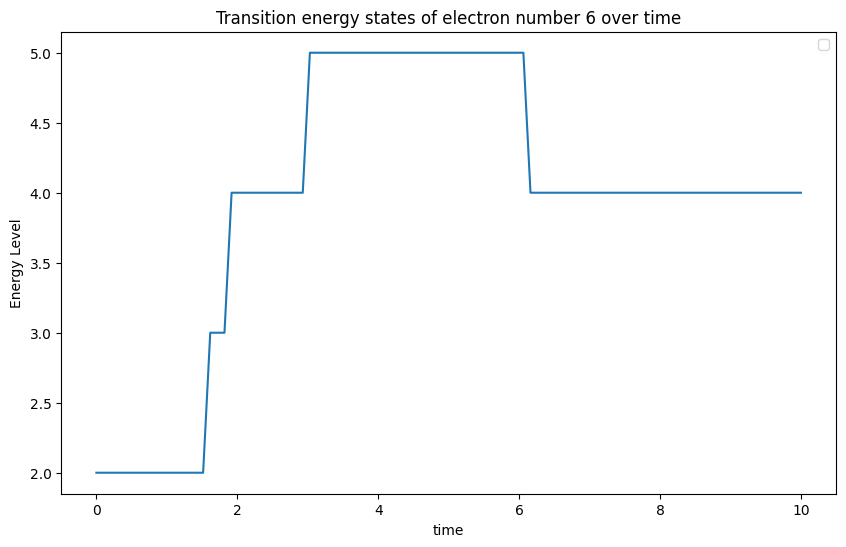

In [ ]:
# Importation of the required librairies

import random
import numpy as np
import matplotlib.pyplot as plt

#%% Initialization


# Parameters
  ## Number of electrons in the Quantum Well QW
num_electrons = 10
  ## Temperature in eV scale
T= 0.2
  ## Definition of probabilities of susceptible events
   ### Events : jumping up, down or nothing
j_up=0.2
j_down=0.8

  ## Time parameters
   ### Maximum value of iterations
Max=10
   ### Length of each iteration
dt=1/Max
   ### Number od steps
num_steps = int(Max/dt)
print(num_steps)

   ### Time range for electrons
time = np.linspace(0,Max,num_steps)


  ## Electrons energy
   ### Number of energy levels in the Quantum Well QW
energy_states = np.arange(1, 5)
energy_states

   ### Random choice of energy level for each electron
ene_store=np.random.randint(low=1, high=5, size=num_electrons)

   ### Record the energy level of a single selected electron over time
ener=np.zeros(num_steps)




#%% Monte Carlo loop

# Perform Monte Carlo simulation

for step in range(num_steps):
    # Random selection of an electron for a probable transition
    electron_index = np.random.randint(num_electrons)

    # Calculate the potential energy difference for jumping to a neighboring position
    potential_energy_diff = np.abs(ene_store - ene_store[electron_index])

    # Calculate the probability of jumping to a neighboring position
    jump_probabilities = np.exp(-potential_energy_diff/T)

    # Normalize the jump probabilities
    jump_probabilities /= jump_probabilities.sum()

    #Probability of the event to occur
     ## Required condition for each event to happen

      ### Jumping up: switch the energy by adding +1
    ## Events
    a=np.random.rand()

    if a<j_up:
      ene_store[electron_index]+=1
      ### Jumping down: switch the energy by substracting +1
    elif a<j_up+j_down:
      if ene_store[electron_index]-1>1:
        ene_store[electron_index]-=1


    # Track the energy of an electron selected (choice given by the user) over time
    n_select=5
    ener[step] = ene_store[n_select]

#Print the energies of the selected electron (by user) over time
print(ener)


# Plot the transition energy states of the selected electron over time
plt.figure(figsize=(10, 6))
plt.plot(time,ener)
plt.xlabel('time')
plt.ylabel('Energy Level')
plt.title('Transition energy states of electron number %i over time' %(n_select+1))
plt.legend()
plt.show()

